## Crypto Arbitrage

In this Challenge, you'll take on the role of an analyst at a high-tech investment firm. The vice president (VP) of your department is considering arbitrage opportunities in Bitcoin and other cryptocurrencies. As Bitcoin trades on markets across the globe, can you capitalize on simultaneous price dislocations in those markets by using the powers of Pandas?

For this assignment, you’ll sort through historical trade data for Bitcoin on two exchanges: Bitstamp and Coinbase. Your task is to apply the three phases of financial analysis to determine if any arbitrage opportunities exist for Bitcoin.

This aspect of the Challenge will consist of 3 phases.

1. Collect the data.

2. Prepare the data.

3. Analyze the data. 



###  Import the required libraries and dependencies.

In [1]:
import pandas as pd
from pathlib import Path
%matplotlib inline
import numpy as np

## Collect the Data

To collect the data that you’ll need, complete the following steps:

Instructions. 

1. Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

2. Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

3. Repeat Steps 1 and 2 for `coinbase.csv` file.

In [2]:
#csvpath = Path("../Starter_Code/Resources/bitstamp.csv")
#test =pd.read_csv(csvpath)

#csvpaths = Path("../Starter_Code/Resources/coinbase.csv")
#test2 = pd.read_csv(csvpaths)

### Step 1: Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

In [3]:
# Read in the CSV file called "bitstamp.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Date"
# Set the parse_dates and infer_datetime_format parameters
#bitstamp = # YOUR CODE HERE
bitsstamp = bitstamp_dataframe = pd.read_csv(
     Path("../Starter_Code/Resources/bitstamp.csv"),
     index_col = "Timestamp",
     parse_dates =True,
     infer_datetime_format= True
)

### Step 2: Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

In [4]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
# YOUR CODE HERE
bitsstamp.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,$13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,$13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,$13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,$13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,$13620.0,1.069665,14582.660932,13632.923329


In [5]:
bitsstamp.describe(include ="all")


,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
count,129067.000000,129067.000000,129067.000000,129540,129067.000000,1.290670e+05,129067.000000
unique,NaN,NaN,NaN,97727,NaN,NaN,NaN
top,NaN,NaN,NaN,$nan,NaN,NaN,NaN
freq,NaN,NaN,NaN,473,NaN,NaN,NaN
mean,10459.993683,10472.970114,10446.214703,NaN,11.792878,1.177496e+05,10459.384448
std,2315.909269,2318.929342,2312.331601,NaN,21.799938,2.070551e+05,2315.723480
min,5945.950000,5975.060000,5920.720000,NaN,0.000039,3.333436e-01,5949.997212
25%,8613.985000,8621.655000,8604.440000,NaN,1.711874,1.773244e+04,8613.587020
50%,10145.300000,10156.410000,10131.740000,NaN,4.994095,5.188050e+04,10144.740411
75%,11444.455000,11453.990000,11431.970000,NaN,12.717950,1.313104e+05,11443.791560


In [6]:
bitsstamp.isnull().sum()

Open              473
High              473
Low               473
Close               0
BTC Volume        473
USD Volume        473
Weighted Price    473
dtype: int64

In [7]:
#Checking number of rows in bitsstamp
print(len(bitsstamp))

129540


### Step 3: Repeat Steps 1 and 2 for `coinbase.csv` file.

In [8]:
# Read in the CSV file called "coinbase.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Timestamp"
# Set the parse_dates and infer_datetime_format parameters
#coinbase = # YOUR CODE HERE

coinbase = coinbase_dataframe = pd.read_csv(
     Path("../Starter_Code/Resources/coinbase.csv"),
     index_col = "Timestamp",
     parse_dates =True,
     infer_datetime_format= True
)



In [9]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
# YOUR CODE HERE
coinbase.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,$13608.49,20.812754,283451.08537,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,$13601.66,13.474359,183283.97801,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,$13580.0,11.536360,156789.19686,13590.872506
2018-01-01 00:03:00,13587.31,13587.31,13542.70,$13550.34,16.328039,221413.64182,13560.332806
2018-01-01 00:04:00,13550.34,13585.95,13550.34,$13583.44,9.955364,135141.26944,13574.719401


In [10]:
coinbase.describe(include="all")

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
count,129322.000000,129322.000000,129322.000000,129540,129322.000000,1.293220e+05,129322.000000
unique,NaN,NaN,NaN,70129,NaN,NaN,NaN
top,NaN,NaN,NaN,$nan,NaN,NaN,NaN
freq,NaN,NaN,NaN,218,NaN,NaN,NaN
mean,10449.213185,10456.118514,10441.872248,NaN,15.666556,1.572565e+05,10448.964130
std,2317.194653,2317.710389,2316.570594,NaN,27.481647,2.667879e+05,2317.167139
min,5882.300000,5907.280000,5873.000000,NaN,0.000442,6.699174e+00,5883.394912
25%,8609.230000,8613.872500,8603.505000,NaN,2.999125,3.071222e+04,8609.135020
50%,10137.440000,10145.900000,10127.880000,NaN,7.092572,7.461366e+04,10136.035004
75%,11397.522500,11400.000000,11390.000000,NaN,16.954279,1.754530e+05,11396.970843


In [11]:
coinbase.isnull().sum()

Open              218
High              218
Low               218
Close               0
BTC Volume        218
USD Volume        218
Weighted Price    218
dtype: int64

In [12]:
#Checking number of rows in data base
print(len(coinbase))

129540


## Prepare the Data

To prepare and clean your data for analysis, complete the following steps:

1. For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

2. Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

3. Convert the data type of the Close column to a `float`.

4. Review the data for duplicated values, and drop them if necessary.

5. Repeat Steps 1–4 for the coinbase DataFrame.

### Step 1: For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

In [13]:
# For the bitstamp DataFrame, replace or drop all NaNs or missing values in the DataFrame, droping NAN because the number is nan is 473Nan out of 129540 rows 
# YOUR CODE HERE
bitsstamp.dropna()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,$13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,$13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,$13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,$13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,$13620.0,1.069665,14582.660932,13632.923329
...,...,...,...,...,...,...,...
2018-03-31 23:55:00,6935.01,6939.07,6922.56,$6922.56,1.044354,7240.034602,6932.550078
2018-03-31 23:56:00,6922.02,6922.02,6918.00,$6920.32,3.069539,21245.076275,6921.260233
2018-03-31 23:57:00,6920.33,6936.42,6920.33,$6934.72,28.239049,195789.408220,6933.286106


In [14]:
#Changing bitsstamp to  and checking to make sure the NaN was removed

bitsstamp = bitsstamp.dropna()
bitsstamp.isnull().sum()

Open              0
High              0
Low               0
Close             0
BTC Volume        0
USD Volume        0
Weighted Price    0
dtype: int64

### Step 2: Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

In [15]:
# Use the str.replace function to remove the dollar sign, $
# YOUR CODE HERE
bitsstamp.loc[:,"Close"] = bitsstamp.loc[:,"Close"].str.replace("$","")
bitsstamp


C:\Users\todid\AppData\Local\Temp/ipykernel_22812/10408135.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  bitsstamp.loc[:,"Close"] = bitsstamp.loc[:,"Close"].str.replace("$","")
C:\Users\todid\anaconda3\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,13620.0,1.069665,14582.660932,13632.923329
...,...,...,...,...,...,...,...
2018-03-31 23:55:00,6935.01,6939.07,6922.56,6922.56,1.044354,7240.034602,6932.550078
2018-03-31 23:56:00,6922.02,6922.02,6918.00,6920.32,3.069539,21245.076275,6921.260233
2018-03-31 23:57:00,6920.33,6936.42,6920.33,6934.72,28.239049,195789.408220,6933.286106


### Step 3: Convert the data type of the Close column to a `float`.

In [16]:
# Convert the Close data type to a float
# YOUR CODE HERE

bitsstamp.loc[:,"Close"] = bitsstamp.loc[:,"Close"].astype("float")
bitsstamp.dtypes

C:\Users\todid\anaconda3\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Open              float64
High              float64
Low               float64
Close             float64
BTC Volume        float64
USD Volume        float64
Weighted Price    float64
dtype: object

### Step 4: Review the data for duplicated values, and drop them if necessary.

In [17]:
# Review the data for duplicate values, and drop them if necessary
# YOUR CODE HERE
bitsstamp.duplicated().sum()

0

### Step 5: Repeat Steps 1–4 for the coinbase DataFrame.

In [18]:
# DataFrame, replace or drop all NaNs or missing values in the DataFrame, droping NAN because the number is nan is 218 Nan out of 129540 rows 
coinbase.dropna()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,$13608.49,20.812754,283451.085370,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,$13601.66,13.474359,183283.978010,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,$13580.0,11.536360,156789.196860,13590.872506
2018-01-01 00:03:00,13587.31,13587.31,13542.70,$13550.34,16.328039,221413.641820,13560.332806
2018-01-01 00:04:00,13550.34,13585.95,13550.34,$13583.44,9.955364,135141.269440,13574.719401
...,...,...,...,...,...,...,...
2018-03-31 23:55:00,6945.20,6948.06,6930.00,$6930.0,5.802288,40243.918480,6935.869979
2018-03-31 23:56:00,6930.00,6930.01,6930.00,$6930.01,0.625053,4331.620701,6930.005567
2018-03-31 23:57:00,6930.01,6933.91,6930.01,$6933.91,0.776431,5382.532162,6932.405747


In [19]:
#Changing bitsstamp to  and checking to make sure the NaN was removed

coinbase = coinbase.dropna()
coinbase.isnull().sum()

Open              0
High              0
Low               0
Close             0
BTC Volume        0
USD Volume        0
Weighted Price    0
dtype: int64

In [20]:
# Use the str.replace function to remove the dollar sign, $
# YOUR CODE HERE
coinbase.loc[:,"Close"] = coinbase.loc[:,"Close"].str.replace("$","")
coinbase

C:\Users\todid\AppData\Local\Temp/ipykernel_22812/1959018417.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  coinbase.loc[:,"Close"] = coinbase.loc[:,"Close"].str.replace("$","")
C:\Users\todid\anaconda3\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,13608.49,20.812754,283451.085370,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,13601.66,13.474359,183283.978010,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,13580.0,11.536360,156789.196860,13590.872506
2018-01-01 00:03:00,13587.31,13587.31,13542.70,13550.34,16.328039,221413.641820,13560.332806
2018-01-01 00:04:00,13550.34,13585.95,13550.34,13583.44,9.955364,135141.269440,13574.719401
...,...,...,...,...,...,...,...
2018-03-31 23:55:00,6945.20,6948.06,6930.00,6930.0,5.802288,40243.918480,6935.869979
2018-03-31 23:56:00,6930.00,6930.01,6930.00,6930.01,0.625053,4331.620701,6930.005567
2018-03-31 23:57:00,6930.01,6933.91,6930.01,6933.91,0.776431,5382.532162,6932.405747


In [21]:
# Convert the Close data type to a float
# YOUR CODE HERE

coinbase.loc[:,"Close"] = coinbase.loc[:,"Close"].astype("float")
coinbase.dtypes

C:\Users\todid\anaconda3\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Open              float64
High              float64
Low               float64
Close             float64
BTC Volume        float64
USD Volume        float64
Weighted Price    float64
dtype: object

In [22]:
# Review the data for duplicate values, and drop them if necessary
# YOUR CODE HERE
coinbase.duplicated().sum()

0

## Analyze the Data

Your analysis consists of the following tasks: 

1. Choose the columns of data on which to focus your analysis.

2. Get the summary statistics and plot the data.

3. Focus your analysis on specific dates.

4. Calculate the arbitrage profits.

### Step 1: Choose columns of data on which to focus your analysis.

Select the data you want to analyze. Use `loc` or `iloc` to select the following columns of data for both the bitstamp and coinbase DataFrames:

* Timestamp (index)

* Close


In [23]:
#Finding  the head and tail of bitsstamp 
bitsstamp.head()


,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,13620.00,1.069665,14582.660932,13632.923329


In [24]:
#Find the tail of bitsstamp

bitsstamp.tail()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-03-31 23:55:00,6935.01,6939.07,6922.56,6922.56,1.044354,7240.034602,6932.550078
2018-03-31 23:56:00,6922.02,6922.02,6918.00,6920.32,3.069539,21245.076275,6921.260233
2018-03-31 23:57:00,6920.33,6936.42,6920.33,6934.72,28.239049,195789.408220,6933.286106
2018-03-31 23:58:00,6927.65,6929.42,6927.65,6927.65,0.839507,5817.007705,6929.080007
2018-03-31 23:59:00,6929.98,6929.98,6928.00,6928.01,0.209363,1450.735763,6929.289993


In [25]:
# Used loc  to select `Timestamp (the index)` and `Close` from bitstamp DataFrame
#bitstamp_sliced = # YOUR CODE HERE

bitsstamp_sliced = bitsstamp.loc[:,"Close"]
# Review the first five rows of the DataFrame
bitsstamp_sliced.head()

Timestamp
2018-01-01 00:00:00    13646.48
2018-01-01 00:01:00    13658.75
2018-01-01 00:02:00    13610.22
2018-01-01 00:03:00    13639.09
2018-01-01 00:04:00    13620.00
Name: Close, dtype: float64

In [26]:
# Used iloc to select `Timestamp (the index)` and `Close` from coinbase DataFrame
#coinbase_sliced =
coinbase_sliced = coinbase.iloc[:,3]


# Review the first five rows of the DataFrame
coinbase_sliced.head()


Timestamp
2018-01-01 00:00:00    13608.49
2018-01-01 00:01:00    13601.66
2018-01-01 00:02:00    13580.00
2018-01-01 00:03:00    13550.34
2018-01-01 00:04:00    13583.44
Name: Close, dtype: float64

### Step 2: Get summary statistics and plot the data.

Sort through the time series data associated with the bitstamp and coinbase DataFrames to identify potential arbitrage opportunities. To do so, complete the following steps:

1. Generate the summary statistics for each DataFrame by using the `describe` function.

2. For each DataFrame, create a line plot for the full period of time in the dataset. Be sure to tailor the figure size, title, and color to each visualization.

3. In one plot, overlay the visualizations that you created in Step 2 for bitstamp and coinbase. Be sure to adjust the legend and title for this new visualization.

4. Using the `loc` and `plot` functions, plot the price action of the assets on each exchange for different dates and times. Your goal is to evaluate how the spread between the two exchanges changed across the time period that the datasets define. Did the degree of spread change as time progressed?

In [27]:
# Generate the summary statistics for the bitstamp DataFrame
bitsstamp.describe()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
count,129067.000000,129067.000000,129067.000000,129067.000000,129067.000000,1.290670e+05,129067.000000
mean,10459.993683,10472.970114,10446.214703,10459.842453,11.792878,1.177496e+05,10459.384448
std,2315.909269,2318.929342,2312.331601,2315.976088,21.799938,2.070551e+05,2315.723480
min,5945.950000,5975.060000,5920.720000,5944.000000,0.000039,3.333436e-01,5949.997212
25%,8613.985000,8621.655000,8604.440000,8613.370000,1.711874,1.773244e+04,8613.587020
50%,10145.300000,10156.410000,10131.740000,10145.950000,4.994095,5.188050e+04,10144.740411
75%,11444.455000,11453.990000,11431.970000,11444.810000,12.717950,1.313104e+05,11443.791560
max,17234.980000,17234.990000,17214.960000,17234.980000,580.646391,5.483271e+06,17227.810502


In [28]:
# Generate the summary statistics for the coinbase DataFrame
coinbase.describe()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
count,129322.000000,129322.000000,129322.000000,129322.000000,129322.000000,1.293220e+05,129322.000000
mean,10449.213185,10456.118514,10441.872248,10449.140958,15.666556,1.572565e+05,10448.964130
std,2317.194653,2317.710389,2316.570594,2317.197419,27.481647,2.667879e+05,2317.167139
min,5882.300000,5907.280000,5873.000000,5882.310000,0.000442,6.699174e+00,5883.394912
25%,8609.230000,8613.872500,8603.505000,8609.230000,2.999125,3.071222e+04,8609.135020
50%,10137.440000,10145.900000,10127.880000,10137.440000,7.092572,7.461366e+04,10136.035004
75%,11397.522500,11400.000000,11390.000000,11397.237500,16.954279,1.754530e+05,11396.970843
max,17178.000000,17178.000000,17177.990000,17177.990000,959.084903,1.152334e+07,17177.995495


<AxesSubplot:title={'center':'Bitsstamp Performance 1st Quarter 2018'}, xlabel='Timestamp'>

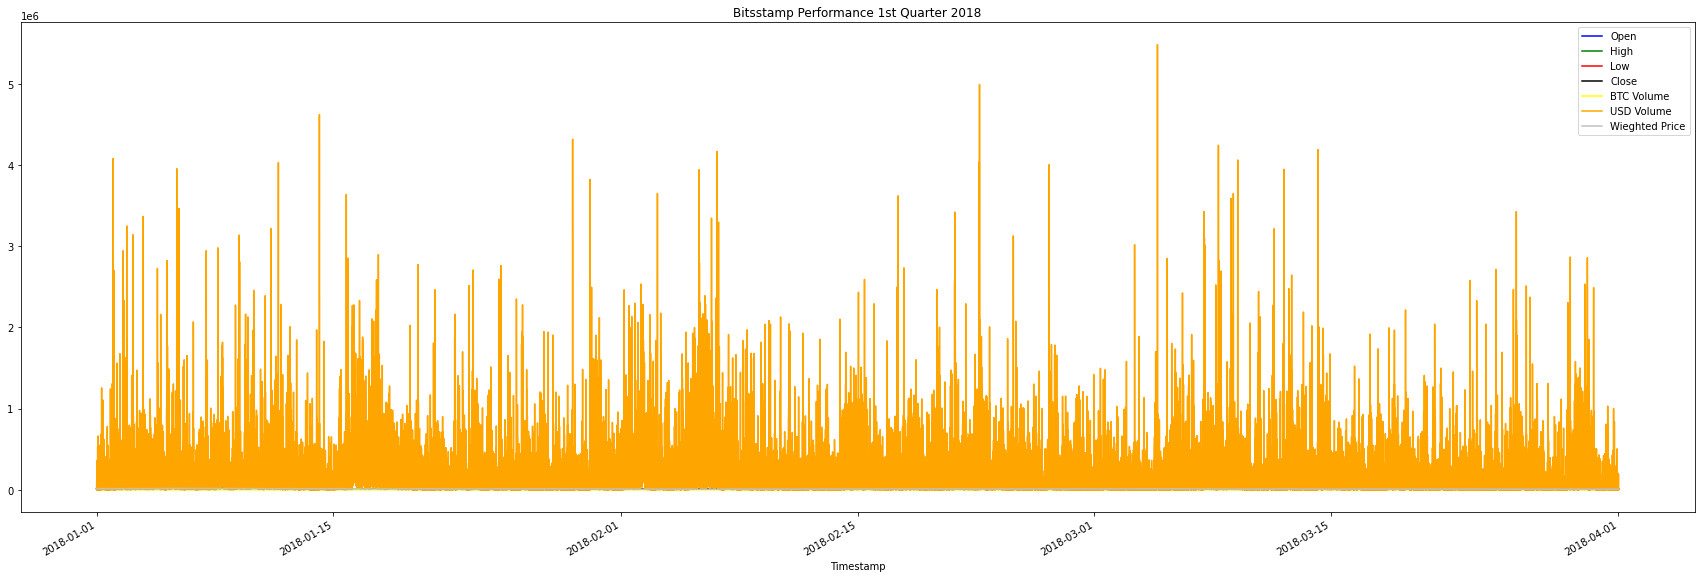

In [29]:
# Create a line plot for the bitstamp DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
#Justed wanted to see if changing the legends colors would add value
bitsstamp["Open"].plot(legend= True, figsize = (30,10), title = "Bitsstamp Performance 1st Quarter 2018", color = "blue", label = "Open")
bitsstamp["High"].plot(legend=True, figsize=(30,10), color = "Green", label = "High")
bitsstamp["Low"].plot(legend=True, figsize=(30,10), color = "red", label = "Low")
bitsstamp["Close"].plot(legend=True, figsize=(30,10), color = "black", label = "Close")
bitsstamp["BTC Volume"].plot(legend=True, figsize=(30,10), color = "yellow", label = "BTC Volume")
bitsstamp["USD Volume"].plot(legend=True, figsize=(30,10), color = "orange", label = "USD Volume")
bitsstamp["Weighted Price"].plot(legend=True, figsize=(30,10), color = "silver", label = "Wieghted Price")







<AxesSubplot:title={'center':'Bitsstamp Performance 1st Quarter 2018'}, xlabel='Timestamp'>

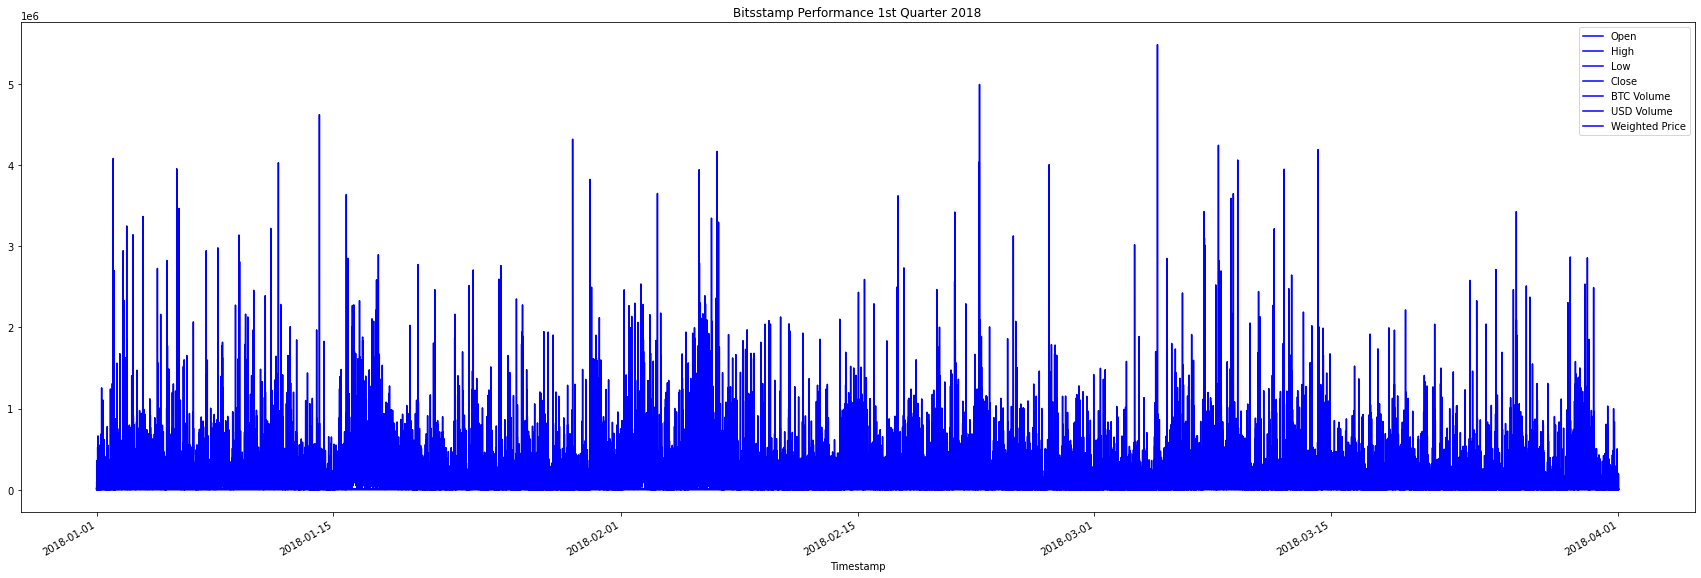

In [30]:
#Asigning Color to wach Column
bitsstamp.plot(figsize = (30,10), title = "Bitsstamp Performance 1st Quarter 2018", color = "blue")

<AxesSubplot:title={'center':'Coinbase Performance 1st Quarter 2018'}, xlabel='Timestamp'>

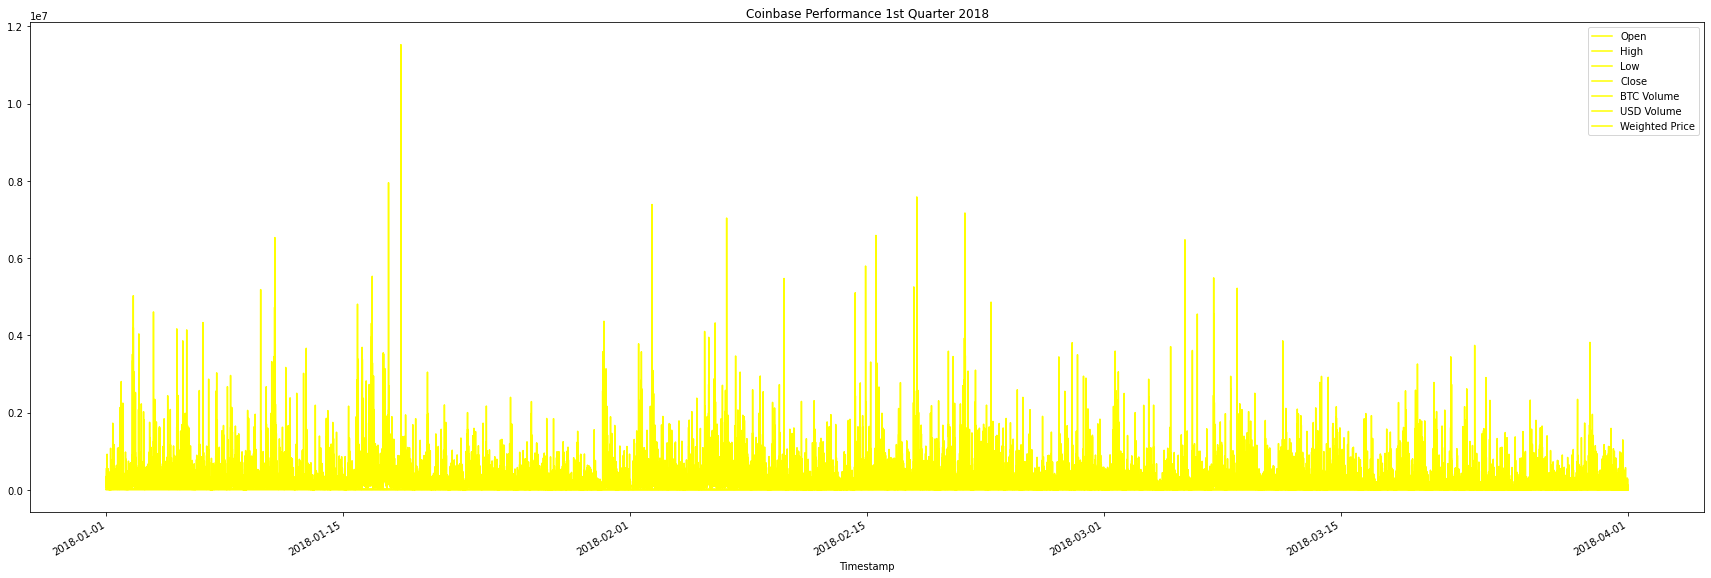

In [31]:
# Create a line plot for the coinbase DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
# YOUR CODE HERE
coinbase.plot(figsize = (30,10), title = "Coinbase Performance 1st Quarter 2018", color = "yellow")

<AxesSubplot:title={'center':'Bitsstamp Performance vs Coinbase Performance 1st Quarter 2018 '}, xlabel='Timestamp'>

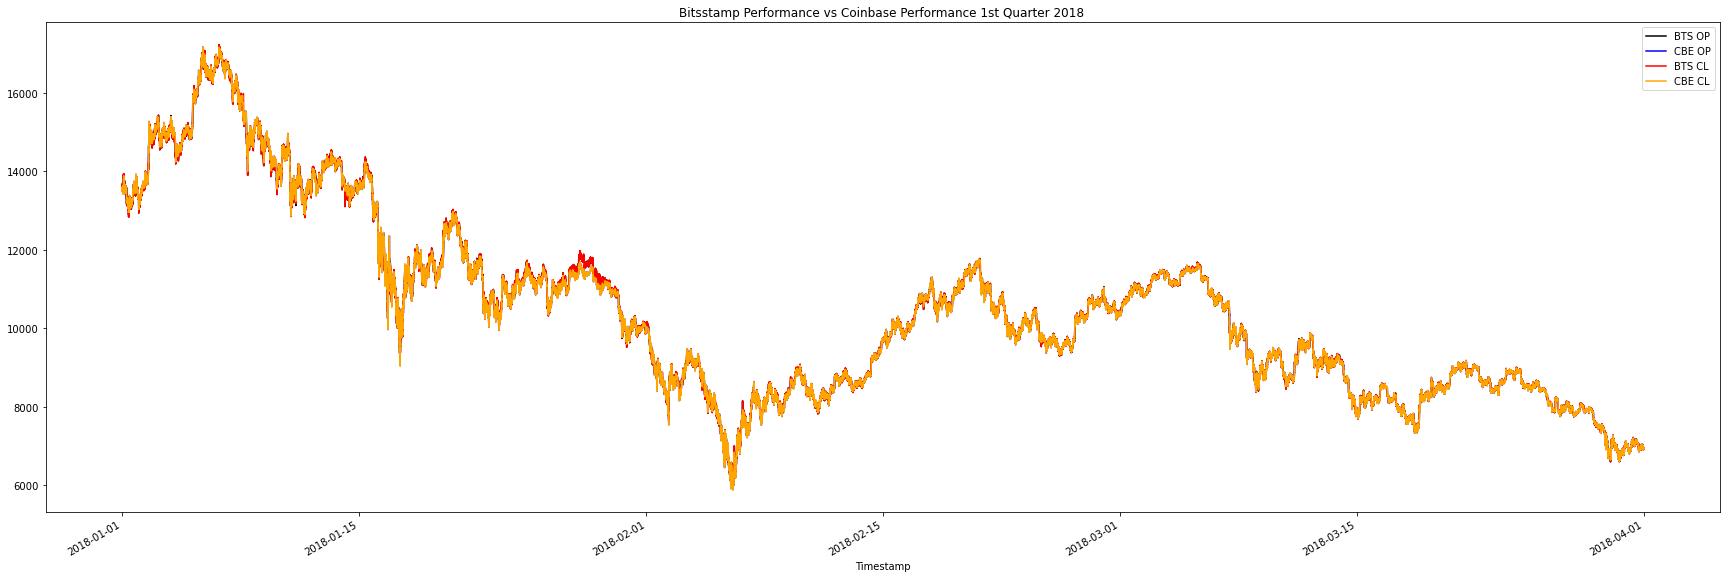

In [32]:
# Overlay the visualizations for the bitstamp and coinbase DataFrames in one plot
# The plot should visualize the prices over the full lenth of the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
# Using average wigthed price 

bitsstamp["Open"].plot(legend= True,figsize = (30,10), title = "Bitsstamp Performance vs Coinbase Performance 1st Quarter 2018 ", color = "black", label = "BTS OP")
coinbase["Open"].plot(legend= True,figsize = (30,10), color = "blue", label = "CBE OP")
bitsstamp["Close"].plot(legend=True, figsize=(30,10), color = "red", label = "BTS CL")
coinbase["Close"].plot(legend=True, figsize=(30,10), color = "orange", label = "CBE CL")
                    

<AxesSubplot:title={'center':'Bitsstamp Performance vs Coinbase Performance 1st Quarter 2018 '}, xlabel='Timestamp'>

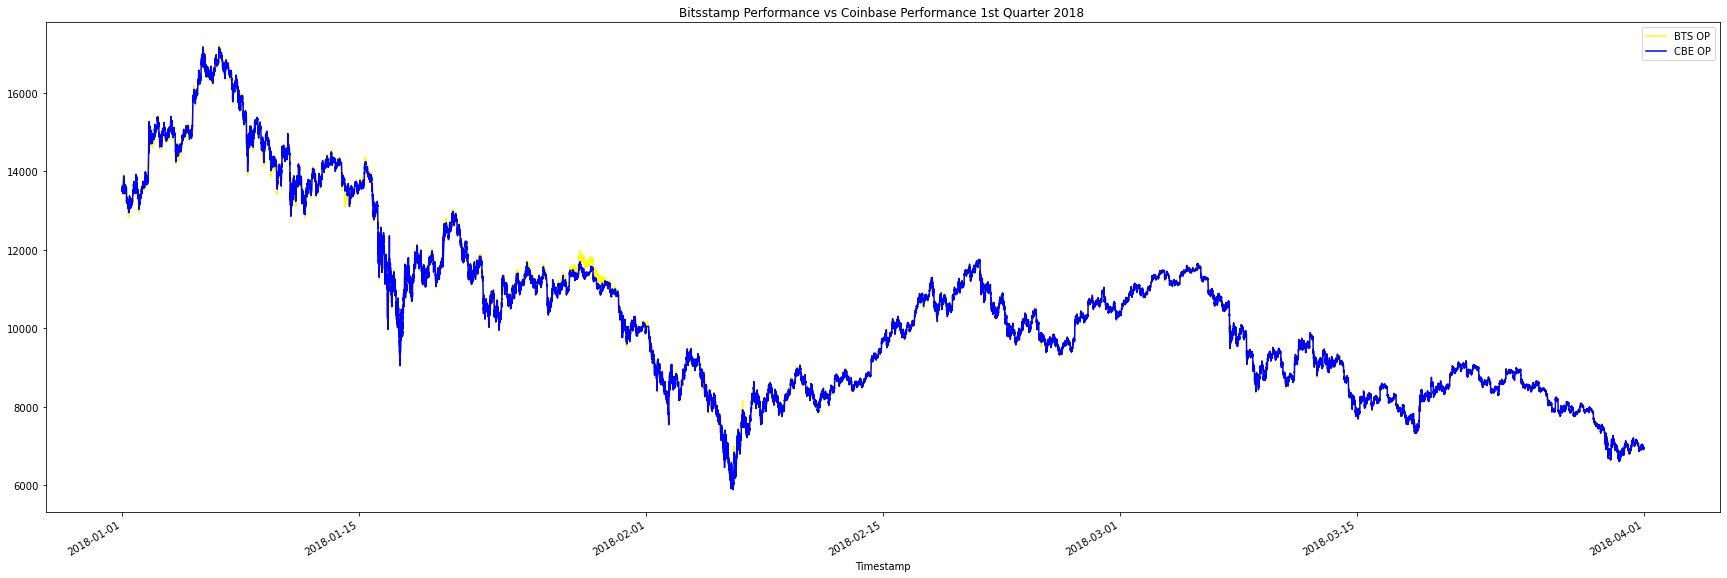

In [33]:
bitsstamp["Open"].plot(legend= True,figsize = (30,10), title = "Bitsstamp Performance vs Coinbase Performance 1st Quarter 2018 ", color = "yellow", label = "BTS OP")
coinbase["Open"].plot(legend= True,figsize = (30,10), color = "blue", label = "CBE OP")

<AxesSubplot:title={'center':'BTS vs CBE'}, xlabel='Timestamp'>

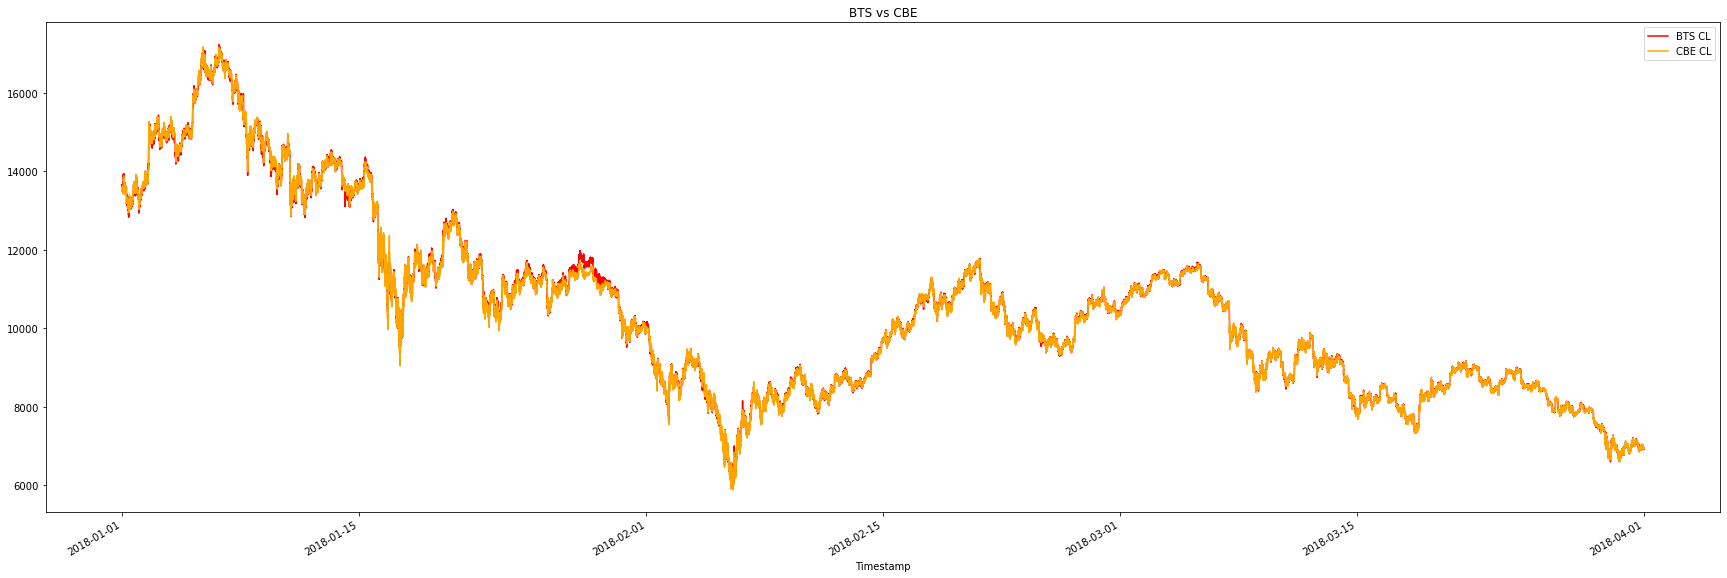

In [34]:
bitsstamp["Close"].plot(legend=True, figsize=(30,10), title="BTS vs CBE", color = "red", label = "BTS CL")
coinbase["Close"].plot(legend=True, figsize=(30,10), color = "orange", label = "CBE CL")

<AxesSubplot:title={'center':'Bitsstamp Performance vs Coinbase Performance 1st Quarter 2018 '}, xlabel='Timestamp'>

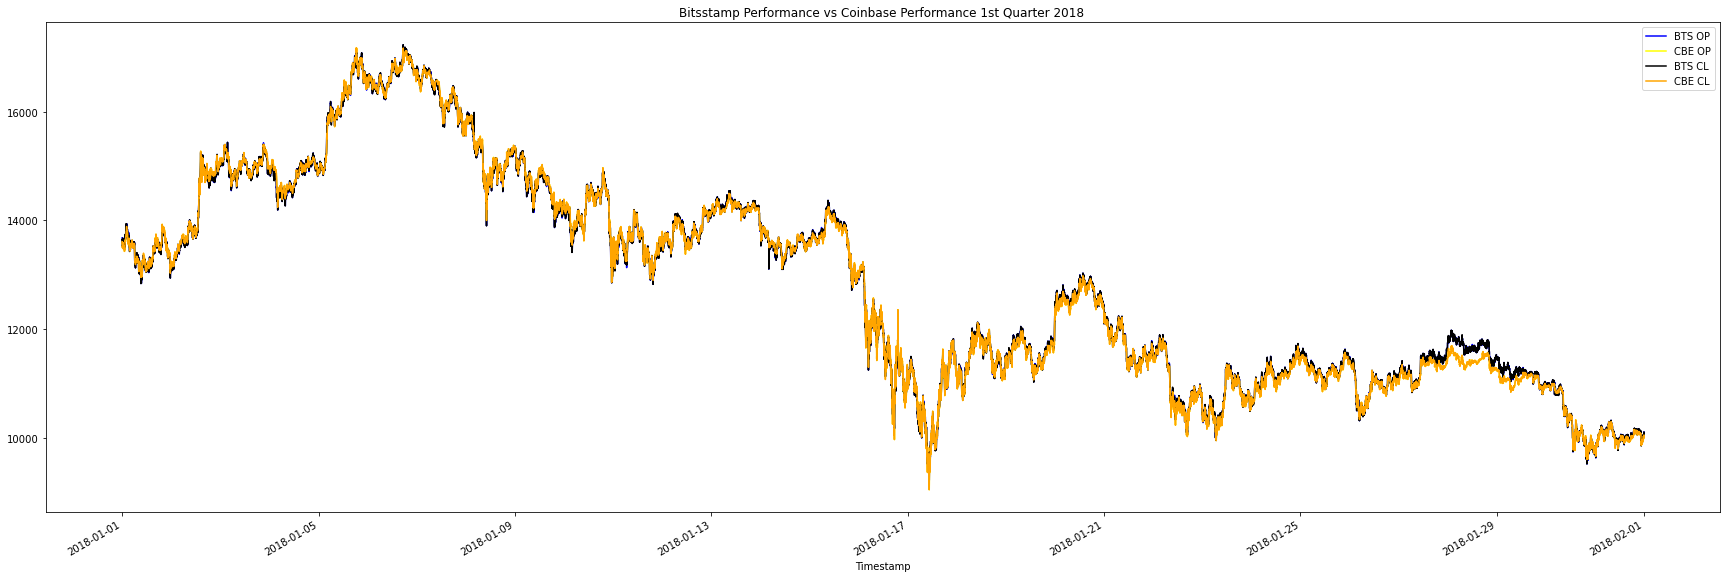

In [35]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period early in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
bitsstamp["Open"].loc["2018-01-01": "2018-01-31"].plot(legend= True,figsize = (30,10), title = "Bitsstamp Performance vs Coinbase Performance 1st Quarter 2018 ", color = "blue", label = "BTS OP")
coinbase["Open"].loc["2018-01-01": "2018-01-31"].plot(legend= True,figsize = (30,10), color = "yellow", label = "CBE OP")
bitsstamp["Close"].loc["2018-01-01": "2018-01-31"].plot(legend=True, figsize=(30,10), color = "black", label = "BTS CL")
coinbase["Close"].loc["2018-01-01": "2018-01-31"].plot(legend=True, figsize=(30,10), color = "orange", label = "CBE CL")

<AxesSubplot:title={'center':'Bitsstamp Performance vs Coinbase Performance 1st Quarter 2018 '}, xlabel='Timestamp'>

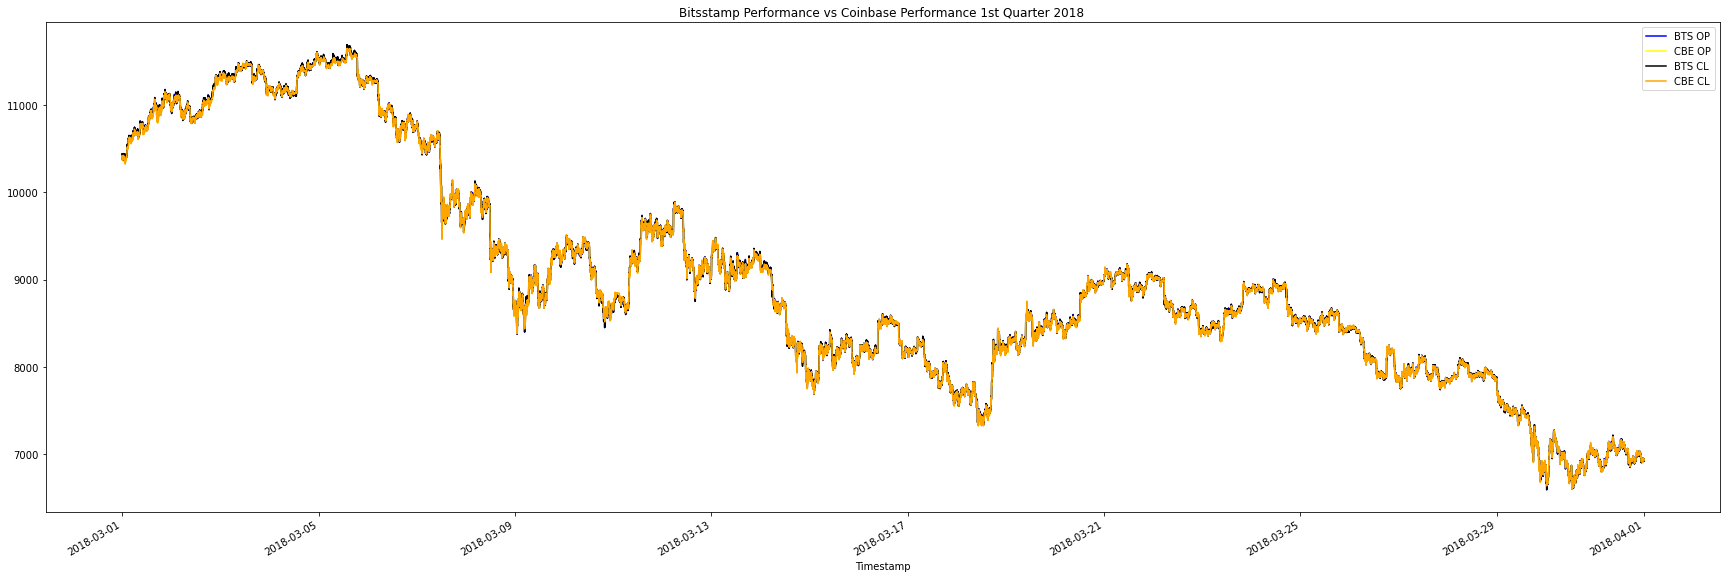

In [36]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period later in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label 
bitsstamp["Open"].loc["2018-03-01": "2018-03-31"].plot(legend= True,figsize = (30,10), title = "Bitsstamp Performance vs Coinbase Performance 1st Quarter 2018 ", color = "blue", label = "BTS OP")
coinbase["Open"].loc["2018-03-01": "2018-03-31"].plot(legend= True,figsize = (30,10), color = "yellow", label = "CBE OP")
bitsstamp["Close"].loc["2018-03-01": "2018-03-31"].plot(legend=True, figsize=(30,10), color = "black", label = "BTS CL")
coinbase["Close"].loc["2018-03-01": "2018-03-31"].plot(legend=True, figsize=(30,10), color = "orange", label = "CBE CL")

**Question** Based on the visualizations of the different time periods, has the degree of spread change as time progressed?

**Answer** The difference between the opening price of Bitstamp and Coinbase is larger in January 2018 than in March 2018.  The difference between the closing price of Bitstamp and the closing price of Coinbase is larger in January than in March 

### Step 3: Focus Your Analysis on Specific Dates

Focus your analysis on specific dates by completing the following steps:

1. Select three dates to evaluate for arbitrage profitability. Choose one date that’s early in the dataset, one from the middle of the dataset, and one from the later part of the time period.

2. For each of the three dates, generate the summary statistics and then create a box plot. This big-picture view is meant to help you gain a better understanding of the data before you perform your arbitrage calculations. As you compare the data, what conclusions can you draw?

<AxesSubplot:title={'center':'Bitsstamp Performance vs Coinbase Performance January 15 2018'}, xlabel='Timestamp'>

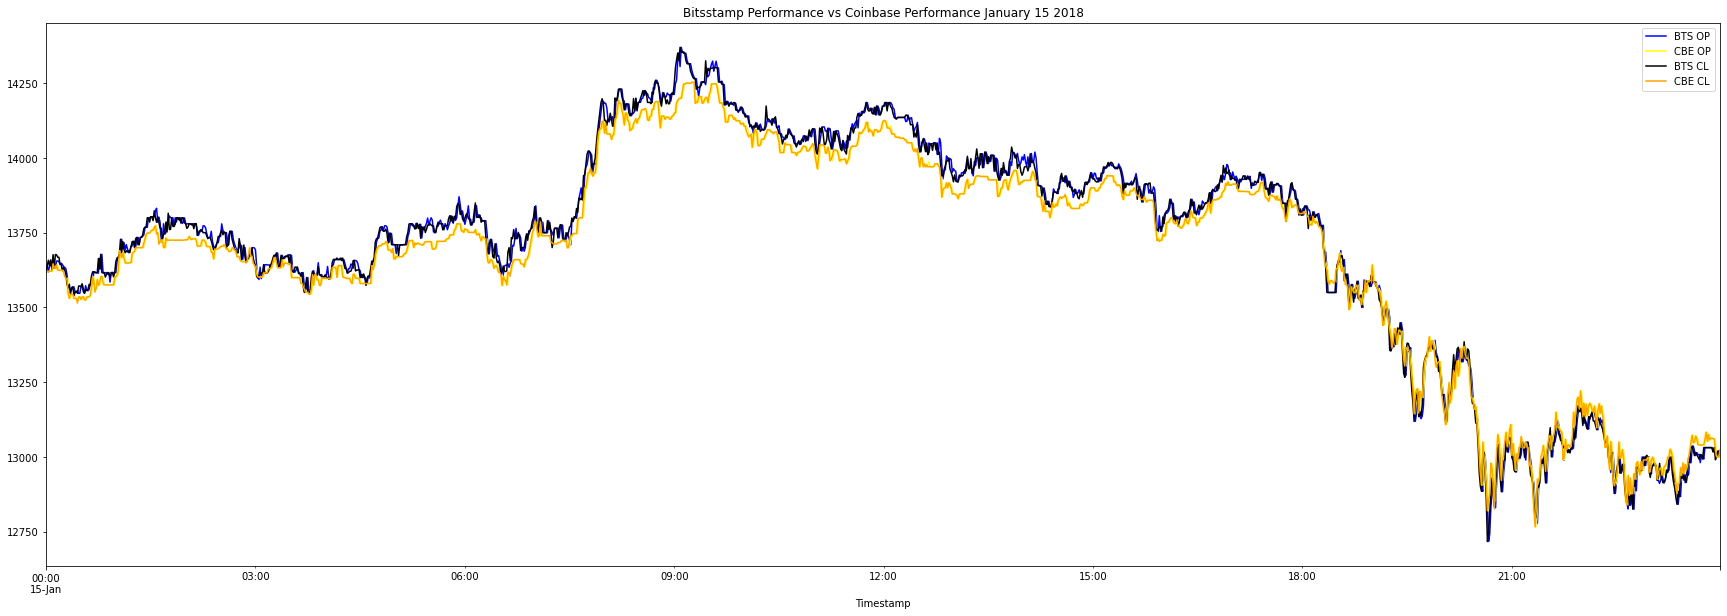

In [37]:
# Create an overlay plot that visualizes the two dataframes over a period of one day early in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
#bitsstamp["Open"].loc["2018-02-01"].plot(legend= True,figsize = (30,10), title = "Bitsstamp Performance vs Coinbase Performance Febuary 1 2018 ", color = "blue", label = "BTS OP")
#coinbase["Open"].loc["2018-02-01"].plot(legend= True,figsize = (30,10), color = "yellow", label = "CBE OP")
bitsstamp["Open"].loc["2018-01-15": "2018-01-15"].plot(legend= True,figsize = (30,10), title = "Bitsstamp Performance vs Coinbase Performance January 15 2018", color = "blue", label = "BTS OP")
coinbase["Open"].loc["2018-01-15": "2018-01-15"].plot(legend= True,figsize = (30,10), color = "yellow", label = "CBE OP")
bitsstamp["Close"].loc["2018-01-15": "2018-01-15"].plot(legend=True, figsize=(30,10), color = "black", label = "BTS CL")
coinbase["Close"].loc["2018-01-15": "2018-01-15"].plot(legend=True, figsize=(30,10), color = "orange", label = "CBE CL")

In [38]:
# Using the early date that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
#arbitrage_spread_early =


arbitrage_spread_early = bitsstamp["Close"].loc["2018-01-15"] - coinbase["Close"].loc["2018-01-15"]

# Generate summary statistics for the early DataFrame
arbitrage_spread_early.describe()

count    1440.000000
mean       28.953458
std        35.145705
min      -106.080000
25%        10.000000
50%        34.035000
75%        52.217500
max       170.980000
Name: Close, dtype: float64

<AxesSubplot:>

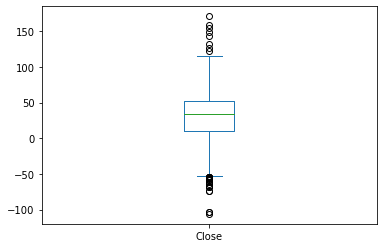

In [39]:
# Visualize the arbitrage spread from early in the dataset in a box plot
arbitrage_spread_early.plot(kind = "box")

<AxesSubplot:title={'center':'Bitsstamp Performance vs Coinbase Performance Febuary 15 2018'}, xlabel='Timestamp'>

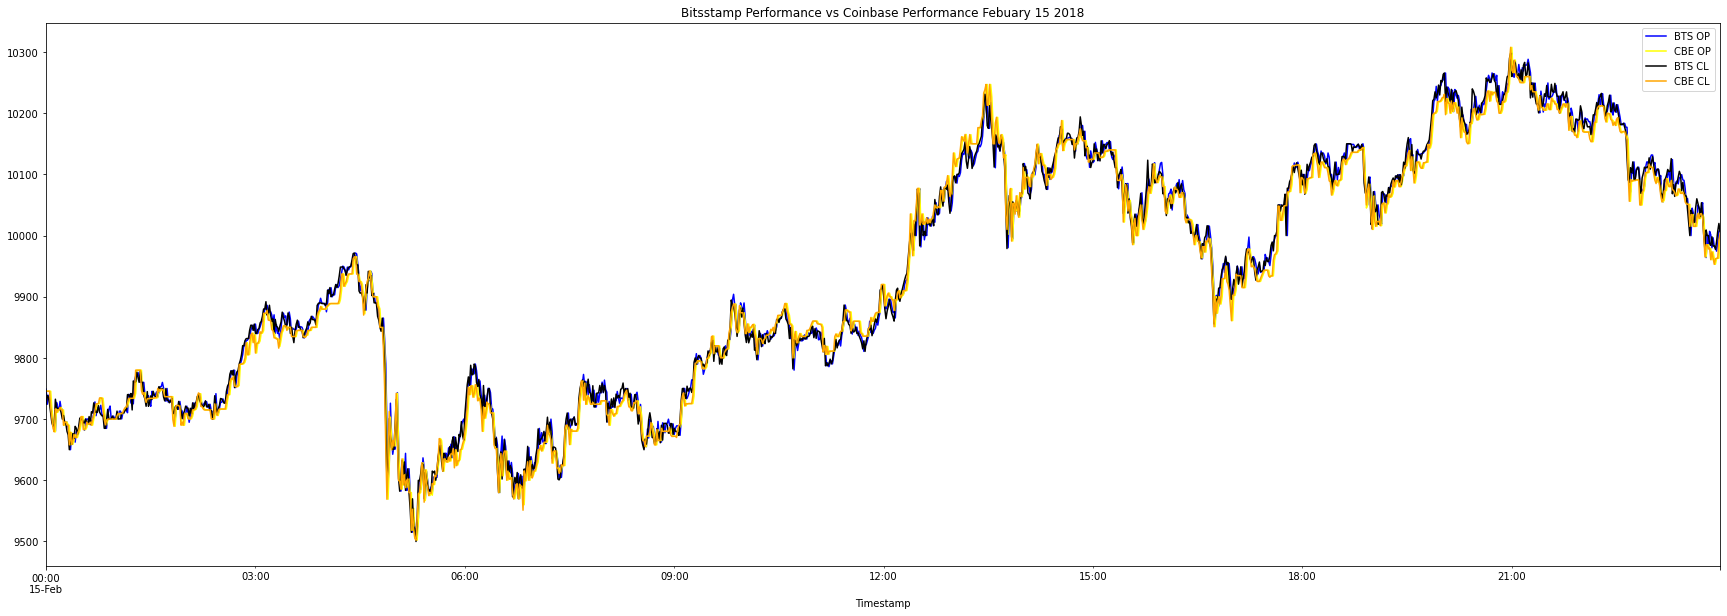

In [40]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from the middle of the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
# YOUR CODE HERE
bitsstamp["Open"].loc["2018-02-15": "2018-02-15"].plot(legend= True,figsize = (30,10), title = "Bitsstamp Performance vs Coinbase Performance Febuary 15 2018", color = "blue", label = "BTS OP")
coinbase["Open"].loc["2018-02-15": "2018-02-15"].plot(legend= True,figsize = (30,10), color = "yellow", label = "CBE OP")
bitsstamp["Close"].loc["2018-02-15": "2018-02-15"].plot(legend=True, figsize=(30,10), color = "black", label = "BTS CL")
coinbase["Close"].loc["2018-02-15": "2018-02-15"].plot(legend=True, figsize=(30,10), color = "orange", label = "CBE CL")

In [41]:
# Using the date in the middle that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
#arbitrage_spread_middle = # YOUR CODE HERE

arbitrage_spread_middle = bitsstamp["Close"].loc["2018-02-15"] - coinbase["Close"].loc["2018-02-15"]

# Generate summary statistics 
arbitrage_spread_middle.describe()

count    1440.000000
mean        5.760007
std        14.908671
min       -48.800000
25%        -3.995000
50%         6.960000
75%        16.217500
max        55.470000
Name: Close, dtype: float64

<AxesSubplot:>

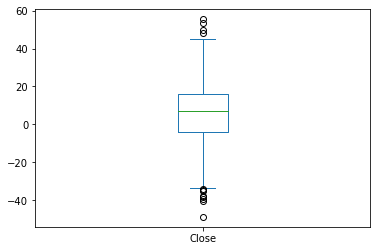

In [42]:
# Visualize the arbitrage spread from the middle of the dataset in a box plot
arbitrage_spread_middle.plot(kind = "box")

<AxesSubplot:title={'center':'Bitsstamp Performance vs Coinbase Performance March 15 2018'}, xlabel='Timestamp'>

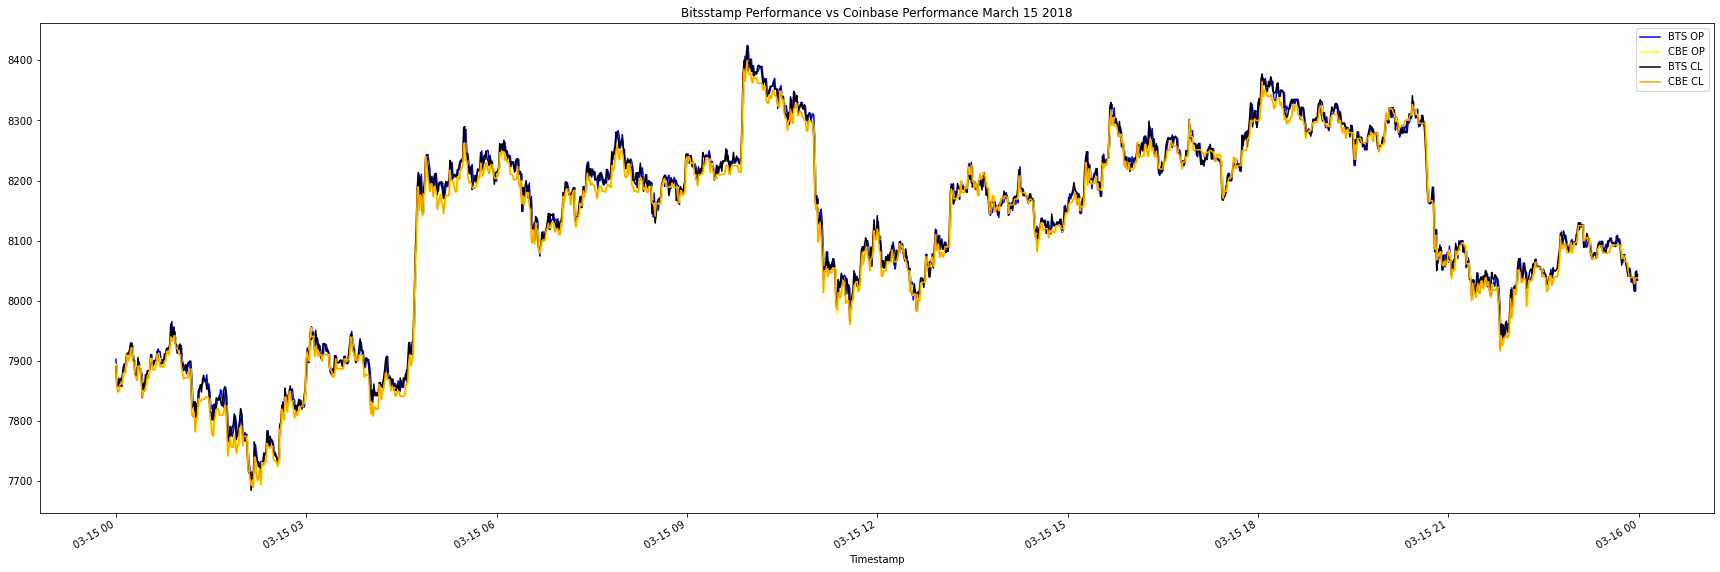

In [43]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from late in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitsstamp["Open"].loc["2018-03-15"].plot(legend= True,figsize = (30,10), title = "Bitsstamp Performance vs Coinbase Performance March 15 2018", color = "blue", label = "BTS OP")
coinbase["Open"].loc["2018-03-15"].plot(legend= True,figsize = (30,10), color = "yellow", label = "CBE OP")
bitsstamp["Close"].loc["2018-03-15"].plot(legend=True, figsize=(30,10), color = "black", label = "BTS CL")
coinbase["Close"].loc["2018-03-15"].plot(legend=True, figsize=(30,10), color = "orange", label = "CBE CL")

In [44]:
# Using the date from the late that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
#arbitrage_spread_late = # YOUR CODE HERE

arbitrage_spread_late = bitsstamp["Close"] - coinbase["Close"].loc["2018-03-15"]

# Generate summary statistics for the late DataFrame
arbitrage_spread_late.describe()

count    1437.00000
mean        8.76572
std        10.74975
min       -24.71000
25%         1.74000
50%         8.74000
75%        15.74000
max        48.98000
Name: Close, dtype: float64

<AxesSubplot:>

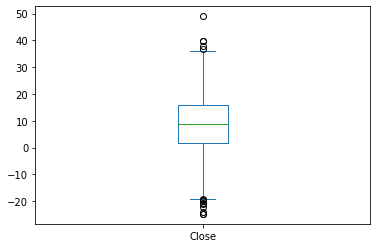

In [45]:
# Visualize the arbitrage spread from late in the dataset in a box plot
arbitrage_spread_late.plot(kind="box")

### Step 4: Calculate the Arbitrage Profits

Calculate the potential profits for each date that you selected in the previous section. Your goal is to determine whether arbitrage opportunities still exist in the Bitcoin market. Complete the following steps:

1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

6. Generate the summary statistics, and plot the results for each of the three DataFrames.

7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

(NOTE: The starter code displays only one date. You'll want to do this analysis for two additional dates).

#### 1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

*NOTE*: For illustration, only one of the three dates is shown in the starter code below.

In [46]:
# For the date early in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one
#arbitrage_spread_early = # YOUR CODE HERE
#Checked early prices
#early_pricecheck_bts =bitsstamp["Close"].loc["2018-01-15"]
#early_pricecheck_cbe =coinbase["Close"].loc["2018-01-15"]

arbitrage_spread_early = bitsstamp["Close"].loc["2018-01-15"] - coinbase["Close"].loc["2018-01-15"]

# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
# YOUR CODE HERE
#early_pricecheck_bts.describe()
#early_pricecheck_cbe.describe()
#absr_.... is the spread return for each date

absr_early = arbitrage_spread_early[arbitrage_spread_early>0]/coinbase["Close"].loc["2018-01-15"]
#absr_early.describe()
early_profitable_trade = absr_early[absr_early> .01]
early_profitable_trade.head(30)
#early_profitable_trade.describe()

Timestamp
2018-01-15 09:01:00    0.010570
2018-01-15 09:02:00    0.010075
2018-01-15 09:03:00    0.011180
2018-01-15 09:05:00    0.012042
2018-01-15 09:06:00    0.010843
Name: Close, dtype: float64

In [47]:
early_profitable_trade.describe()

count    5.000000
mean     0.010942
std      0.000736
min      0.010075
25%      0.010570
50%      0.010843
75%      0.011180
max      0.012042
Name: Close, dtype: float64

In [48]:
#Checked middle prices
#middle_pricecheck_bts =bitsstamp["Close"].loc["2018-02-15"]
#middle_pricecheck_cbe =coinbase["Close"].loc["2018-02-15"]

arbitrage_spread_middle = coinbase["Close"].loc["2018-02-15"] - bitsstamp["Close"].loc["2018-02-15"]

# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
# YOUR CODE HERE
#middle_pricecheck_bts.describe()
#middle_pricecheck_cbe.describe()
print(arbitrage_spread_middle)

Timestamp
2018-02-15 00:00:00    21.30
2018-02-15 00:01:00     6.73
2018-02-15 00:02:00     9.64
2018-02-15 00:03:00    21.18
2018-02-15 00:04:00     7.19
                       ...  
2018-02-15 23:55:00   -15.48
2018-02-15 23:56:00   -27.04
2018-02-15 23:57:00   -44.32
2018-02-15 23:58:00   -28.36
2018-02-15 23:59:00    -3.00
Name: Close, Length: 1440, dtype: float64


In [49]:
#Checked middle prices
#middle_pricecheck_bts =bitsstamp["Close"].loc["2018-02-15"]
#middle_pricecheck_cbe =coinbase["Close"].loc["2018-02-15"]

arbitrage_spread_middle = coinbase["Close"].loc["2018-02-15"] - bitsstamp["Close"].loc["2018-02-15"]

# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
# YOUR CODE HERE
#middle_pricecheck_bts.describe()
#middle_pricecheck_cbe.describe()
#print(arbitrage_spread_middle)
absr_middle = arbitrage_spread_middle[arbitrage_spread_middle>0]/bitsstamp["Close"].loc["2018-02-15"]
absr_middle.head(30)

Timestamp
2018-02-15 00:00:00    0.002190
2018-02-15 00:01:00    0.000691
2018-02-15 00:02:00    0.000990
2018-02-15 00:03:00    0.002178
2018-02-15 00:04:00    0.000740
2018-02-15 00:05:00    0.000726
2018-02-15 00:06:00         NaN
2018-02-15 00:07:00         NaN
2018-02-15 00:08:00         NaN
2018-02-15 00:09:00         NaN
2018-02-15 00:10:00         NaN
2018-02-15 00:11:00         NaN
2018-02-15 00:12:00    0.000101
2018-02-15 00:13:00    0.000514
2018-02-15 00:14:00    0.001545
2018-02-15 00:15:00         NaN
2018-02-15 00:16:00    0.000023
2018-02-15 00:17:00    0.000272
2018-02-15 00:18:00    0.001075
2018-02-15 00:19:00    0.001635
2018-02-15 00:20:00    0.000813
2018-02-15 00:21:00    0.000895
2018-02-15 00:22:00         NaN
2018-02-15 00:23:00         NaN
2018-02-15 00:24:00    0.000691
2018-02-15 00:25:00         NaN
2018-02-15 00:26:00         NaN
2018-02-15 00:27:00    0.000158
2018-02-15 00:28:00         NaN
2018-02-15 00:29:00         NaN
Name: Close, dtype: float64

In [50]:
absr_middle.dropna()


Timestamp
2018-02-15 00:00:00    0.002190
2018-02-15 00:01:00    0.000691
2018-02-15 00:02:00    0.000990
2018-02-15 00:03:00    0.002178
2018-02-15 00:04:00    0.000740
                         ...   
2018-02-15 23:31:00    0.000813
2018-02-15 23:32:00    0.002890
2018-02-15 23:33:00    0.001504
2018-02-15 23:42:00    0.000445
2018-02-15 23:45:00    0.000120
Name: Close, Length: 466, dtype: float64

In [51]:
absr_middle = absr_middle.dropna()

In [52]:
#absr_middle.head(30)
absr_middle.describe()

count    466.000000
mean       0.001135
std        0.000865
min        0.000001
25%        0.000437
50%        0.000990
75%        0.001595
max        0.004880
Name: Close, dtype: float64

In [53]:
middle_profitable_trade = absr_middle[absr_middle> .01]

In [54]:
middle_profitable_trade.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

#### 2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

In [55]:
# For the date early in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
#Checked late prices
#late_pricecheck_bts =bitsstamp["Close"].loc["2018-03-15"]
#late_pricecheck_cbe =coinbase["Close"].loc["2018-03-15"]

arbitrage_spread_late = bitsstamp["Close"].loc["2018-03-15"] - coinbase["Close"].loc["2018-03-15"]

absr_late = arbitrage_spread_late[arbitrage_spread_late>0]/coinbase["Close"].loc["2018-03-15"]

# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame


# YOUR CODE HERE
#late_pricecheck_bts.describe()
#late_pricecheck_cbe.describe()
#print(arbitrage_spread_middle)
late_profitable_trade = absr_late[absr_late> .01]
# Review the spread return DataFrame
late_profitable_trade.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

In [56]:
late_profitable_trade.head()

Series([], Name: Close, dtype: float64)

#### 3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

In [57]:
# For the date early in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
#I will only analyze the early date because the late and middle date do not have any profitable trades
#profitable_trades_early = # YOUR CODE HERE

profitable_trades_early = early_profitable_trade* coinbase["Close"].loc["2018-01-15"]

# Review the first five profitable trades
# YOUR CODE HERE
profitable_trades_early.dropna(inplace=True)
profitable_trades_early.head()

Timestamp
2018-01-15 09:01:00    149.59
2018-01-15 09:02:00    142.92
2018-01-15 09:03:00    158.67
2018-01-15 09:05:00    170.98
2018-01-15 09:06:00    153.97
Name: Close, dtype: float64

In [58]:
# middle date returns
profitable_trades_middle = middle_profitable_trade* bitsstamp["Close"].loc["2018-02-15"]
profitable_trades_middle.dropna(inplace=True)
profitable_trades_middle.head()

Series([], Name: Close, dtype: float64)

In [59]:
#late date returns 
profitable_trades_late = late_profitable_trade* coinbase["Close"].loc["2018-03-15"]
profitable_trades_late.dropna(inplace=True)
profitable_trades_late.head()

Series([], Name: Close, dtype: float64)

#### 4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

In [60]:
# For the date early in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
# YOUR CODE HERE

profitable_trades_early.describe()


count      5.000000
mean     155.226000
std       10.545489
min      142.920000
25%      149.590000
50%      153.970000
75%      158.670000
max      170.980000
Name: Close, dtype: float64

In [61]:
profitable_trades_middle.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

In [62]:
profitable_trades_late.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

#### 5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

In [63]:
# For the date early in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
#profit_early = # YOUR CODE HERE

#profit_early = profitable_trades_early/absr_early.sum()
# Drop any missing values from the profit DataFrame
#profit_per_trade_early = # YOUR CODE HERE
#profit_per_trade_early = profitable_trades_early * coinbase["Close"].loc["2018-01-15"]

# View the early profit DataFrame
#profit_per_trade_early.sum()
ep= profitable_trades_early.sum()
#print(ep)
print(f"The potentail profit per trade is ${ep:.2f}")


The potentail profit per trade is $776.13


In [64]:
#profit_per_trade_middle = arbitrage_spread_middle[arbitrage_spread_middle>.01]
#profit_per_trade_middle.head()
#profit_per_trade_middle.sum()
mp= profitable_trades_middle.sum()
print(mp)
print(f"The potentail profit per trade is ${mp:.2f}")


0.0
The potentail profit per trade is $0.00


In [65]:
#profit_per_trade_late = arbitrage_spread_late[arbitrage_spread_late>.01]
#profit_per_trade_late.head()
#profit_per_trade_late.sum()
lp= profitable_trades_late.sum()
print(lp)
print(f"The potentail profit per trade is ${lp}")


0.0
The potentail profit per trade is $0.0


#### 6. Generate the summary statistics, and plot the results for each of the three DataFrames.

In [66]:
# Generate the summary statistics for the early profit per trade DataFrame
profitable_trades_early.describe()

count      5.000000
mean     155.226000
std       10.545489
min      142.920000
25%      149.590000
50%      153.970000
75%      158.670000
max      170.980000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Early Date Profits'}, xlabel='Timestamp'>

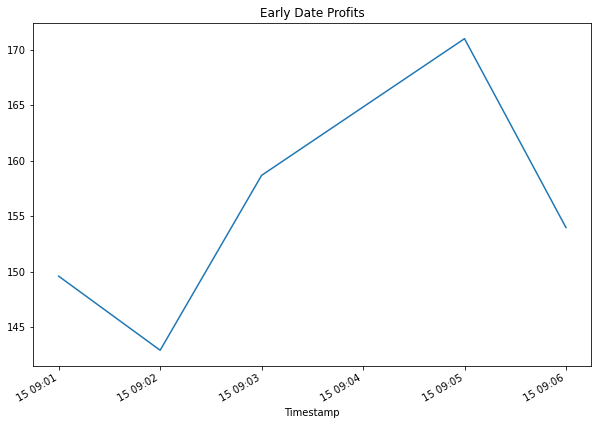

In [67]:
# Plot the results for the early profit per trade DataFrame
profitable_trades_early.plot(figsize =(10,7), title = "Early Date Profits")

In [68]:
# Generate the summary statistics for the early profit per trade DataFrame
profitable_trades_middle.describe()


count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Middle Date Profits'}, xlabel='Timestamp'>

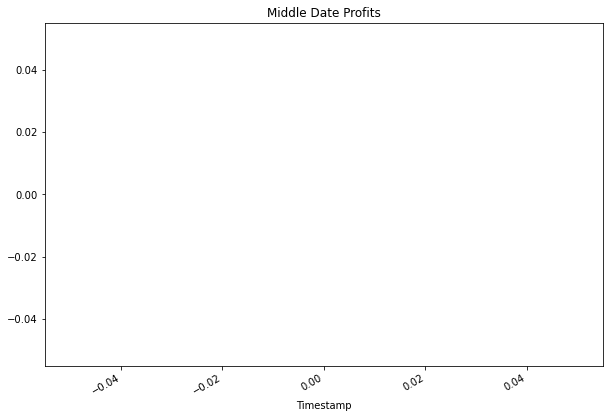

In [69]:
# Plot the results for the early profit per trade DataFrame
profitable_trades_middle.plot(figsize =(10,7), title = "Middle Date Profits")

In [70]:
# Generate the summary statistics for the early profit per trade DataFrame
profitable_trades_late.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Late Date Profits'}, xlabel='Timestamp'>

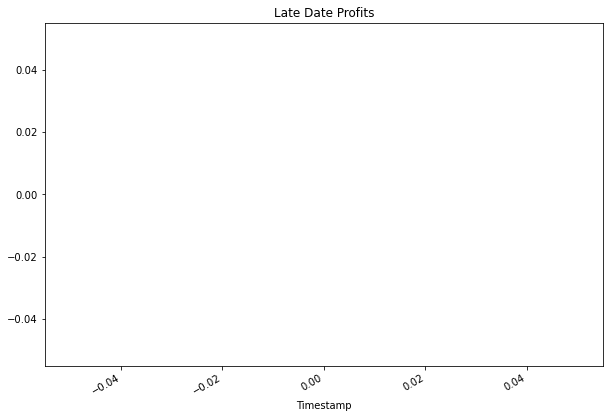

In [71]:
# Plot the results for the early profit per trade DataFrame
profitable_trades_late.plot(figsize =(10,7), title = "Late Date Profits")

#### 7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

In [72]:
# Calculate the sum of the potential profits for the early profit per trade DataFrame
profit_early_7 = profitable_per_trade_early.sum()
profit_early_7
print(f"Potenital arbitrage profits for the January 15, 2018 is $ {profit_early_7}")

NameError: name 'profitable_per_trade_early' is not defined

In [ ]:
# Calculate the sum of the potential profits for the middle profit per trade DataFrame
profit_middle_7 = profit_per_trade_middle.sum()
profit_middle_7
print(f"Potenital arbitrage profits for the Febuary 15, 2018 is $ {profit_middle_7}")

In [ ]:
# Calculate the sum of the potential profits for the late profit per trade DataFrame
profit_late_7 = profit_per_trade_late.sum()
profit_late_7
print(f"Potenital arbitrage profits for the January 15, 2018 is $ {profit_late_7}")

#### 8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

In [ ]:
# Use the cumsum function to calculate the cumulative profits over time for the early profit per trade DataFrame
cumulative_profit_early = profitable_trades_early.cumsum()
cumulative_profit_early

In [ ]:
# Plot the cumulative sum of profits for the early profit per trade DataFrame
cumulative_profit_early.plot(figsize =(10,7), title = "Cumulative Early Profits")

In [ ]:
# Use the cumsum function to calculate the cumulative profits over time for the early profit per trade DataFrame
cumulative_profit_middle = profitable_trades_middle.cumsum()
cumulative_profit_middle

In [ ]:
# Plot the cumulative sum of profits for the early profit per trade DataFrame
cumulative_profit_middle.plot(figsize = (10,7), title = "Cumulative Middle Profits")

In [ ]:
# Use the cumsum function to calculate the cumulative profits over time for the early profit per trade DataFrame
cumulative_profit_late = profitable_trades_late.cumsum()
cumulative_profit_late

In [ ]:
# Plot the cumulative sum of profits for the early profit per trade DataFrame
cumulative_profit_late.plot(figsize =(10,7), title = "Cumulative Late Profits")

**Question:** After reviewing the profit information across each date from the different time periods, can you identify any patterns or trends?
    
**Answer:The potential for profit increases near the end of the day.